# Logistic Regression

In [29]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [30]:
import pandas as pd
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
X_train.shape

(112, 4)

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [54]:
probs_y = classifier.predict_proba(X_test)

In [55]:
for x in probs_y[:10]:
    print([round(y,2) for y in x])

[0.0, 0.06, 0.94]
[0.01, 0.96, 0.03]
[0.98, 0.02, 0.0]
[0.0, 0.02, 0.98]
[0.97, 0.03, 0.0]
[0.0, 0.01, 0.99]
[0.98, 0.02, 0.0]
[0.0, 0.75, 0.25]
[0.0, 0.74, 0.26]
[0.02, 0.94, 0.04]


In [56]:
import numpy as np
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test",
                                                         "y_pred", 
                                                         "Setosa(%)",
                                                         "versicolor(%)",
                                                         "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) 
                 for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.06          | 0.94      
1          | 1          | 0.01       | 0.96          | 0.03      
0          | 0          | 0.98       | 0.02          | 0.0       
2          | 2          | 0.0        | 0.02          | 0.98      
0          | 0          | 0.97       | 0.03          | 0.0       
2          | 2          | 0.0        | 0.01          | 0.99      
0          | 0          | 0.98       | 0.02          | 0.0       
1          | 1          | 0.0        | 0.75          | 0.25      
1          | 1          | 0.0        | 0.74          | 0.26      
1          | 1          | 0.02       | 0.94          | 0.04      
2          | 2          | 0.0        | 0.16          | 0.84      
1          | 1          | 0.01       | 0.81          | 0.18      
1          | 1          | 0.0        | 0.79          | 0.2       
1       

In [57]:
classifier.score(X_test, y_test)

0.9736842105263158

# Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [60]:
df_cm = confusion_matrix(y_test, y_pred, normalize="true")
df_cm

array([[1.    , 0.    , 0.    ],
       [0.    , 0.9375, 0.0625],
       [0.    , 0.    , 1.    ]])

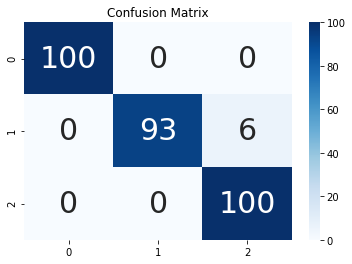

In [62]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()


# 1. Solve classification problem using 'classification.csv' dataset

In [63]:
import pandas as pd
pd.read_csv('classification.csv').head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


## Implement gradient descent on logistic regression

In [64]:
# example of updating one weight
epochs = 50
lr = 0.1
for _ in range(epochs):
    w1 -= lr * x1 * (y_hat - y) # y_hat is predicted value

NameError: name 'w1' is not defined

#### Remember that the derivative of loss function has the following formula
<img src="Loss.png">

In [ ]:
class GradientDescent:
    def __init__():
        pass
    
    def cost_function():
        pass
    
    def update_weights():
        
        pass
    
    def fit(x_test, y_test):
        pass
        
    def predict(x_test):
        return y_pred
    
    def predict_proba(x_test):
        return y_proba
    
    def sigmoid():
        pass

#### visualise the date, do some EDA, find feature importance

##### target variable is 'default'. Apply feature selection, feature scaling, cross validation etc. (anything you think is needed)

# 2. Print accuracy, confusion matrix, precision, recall, sensitivity and specifity on train and test (and maybe validation) datasets.

##### do not use any libraries for metrics, implement yourself